# Introduction

## Background (Same as Week 9 Workshop)

Today, 21 December 2021, we hold a portfolio consisting of physical assets and European options. The specification of each component is as follows:

1. A short position on 1,000 units of the ASX 200
2. A long position on 2,500 units of the S\&P 500 (*Note: prices of the S\&P 500 provided in the data set are in US dollars*)
3. A long position on US\$ 4 million
4. A long position on 10,000 units of a European call option on a share of the ASX 200 with a strike price of \$6,400 per unit and an expiry date of 26 November 2022
5. A long position on 20,000 units of a European put option on a share of the S\&P 500 with a strike price of \$ 2,980 per unit and an expiry date of 23 December 2022

We assume that the risk-free interest rates with maturity 26 November 2022 and 23 December 2022 are 3\% and 3.5\%, respectively. For purposes of option pricing, assume that the (annual) volatility of the ASX 200 and S\&P 500 prices are 20\% and 25\%, respectively. 

## Tasks

Given the time series of financial data in `WorkshopWeek7Data.csv`, perform the following analysis:

1. **(Completed in Week 7 Workshop)** Determine the marked-to-market value of the entire portfolio at the valuation date (21 December 2021).
2. Calculate the one-day 95\% VaR using Monte Carlo simulation for each component and the entire portfolio. Use the models specified below to simulate future values of the underlying risk factors/asset prices.
3. Calculate the 10-day 95\% VaR using Monte Carlo simulation for each component and the entire portfolio using the same modelling assumptions on the underlying risk factors/asset prices.

## Modelling Assumptions

**NOTE:** There is a lot of freedom regarding this aspect of Monte Carlo simulation. The risk manager is free to select any model for the underlying risk factors or asset prices as long as this is consistent with the valuation framework for the constituent financial instruments. Note that this restriction applies especially to financial derivatives where valuation or pricing formulas arise from specific assumptions on the dynamics of the asset prices. For example, the Black-Scholes-Merton pricing formulas rely on the log-normal distribution of underlying asset prices.

For this workshop, we shall work with two sets of models:

**(M1)** Denote by $R_{\text{ASX}}^\ell$, $R_{\text{SPX}}^\ell$, and $R_{\text{USD}}^\ell$ denote the one-day log-returns of the ASX 200, the S\&P500 (AUD price), and the AUD/USD exchange rate, and let $\mathbf{R}^\ell = (R_{\text{ASX}}^\ell, R_{\text{SPX}}^\ell, R_{\text{USD}}^\ell)^\top.$ We assume that $\mathbf{R}^\ell$ has a (multivariate) normal distribution with mean $\mathbb{E}(\mathbf{R}^\ell) = \mathbf{0}$ and covariance matrix $\Sigma := \widehat{\text{Cov}(\mathbf{R}^\ell)}$, the covariance matrix estimated from the time series of one-day log-returns.

**(M2)** Under the historical probability measure $\mathbb{P}$, assume that $S_{\text{ASX}}$, $S_{\text{SPX}}$, and $S_{\text{USD}}$ are modelled as geometric Brownian motions

\begin{align*}
d S_{\text{ASX}}(t) & = 0.15 S_{\text{ASX}}(t) dt + 0.20 S_{\text{ASX}}(t) dW_1(t)\\
d S_{\text{SPX}}(t) & = 0.10 S_{\text{ASX}}(t) dt + 0.25 S_{\text{SPX}}(t) dW_2(t)\\
d S_{\text{USD}}(t) & = 0.15 S_{\text{USD}}(t) dW_3(t)
\end{align*}

where $W_1$, $W_2$, and $W_3$ are Brownian motions with correlations $\text{Corr}(dW_1(t),dW_2(t)) = 0.13$, $\text{Corr}(dW_1(t),dW_3(t)) = 0.24$, and $\text{Corr}(dW_2(t),dW_3(t)) = -0.10$. The specified dynamics for the stock prices and exchange rate implies that the one-day log-returns are given by

\begin{align*}
\ln\left(\frac{S_{\text{ASX}}(t+\Delta t)}{S_{\text{ASX}}(t)}\right) & = \left(0.15 - \frac{1}{2} \times 0.20^2\right) \Delta t + 0.20 \varepsilon_1 \sqrt{\Delta t} \\
\ln\left(\frac{S_{\text{SPX}}(t+\Delta t)}{S_{\text{SPX}}(t)}\right) & = \left(0.10 - \frac{1}{2} \times 0.25^2\right) \Delta t + 0.25 \varepsilon_2 \sqrt{\Delta t} \\
\ln\left(\frac{S_{\text{USD}}(t+\Delta t)}{S_{\text{USD}}(t)}\right) & = - \frac{1}{2} \times 0.15^2 \Delta t + 0.15 \varepsilon_3 \sqrt{\Delta t}
\end{align*}

where $\varepsilon_1,\varepsilon_2,\varepsilon_3$ are normal random variables zero mean and variance 1 with the same correlation as the Brownian motions and $\Delta t$ is the time horizon in years.

### (M1) and the Black-Scholes-Merton model

For valuation and risk management purposes, assume that the Black-Scholes-Merton pricing equations still hold for the European call and put option in the portfolio and that the inputs for the option pricing formulas are as specified in the Background section.

Note that using the given annual volatilities 20\% and 25\% is *not compatible* with the BSM model. Consider a European call option on a single asset with price process $S = \{S(t)\}_{t\geq 0}$. Under the BSM model, we assume that $S$ follows a geometric Brownian motion

$$dS(t) = \mu S(t) dt + \sigma S(t) dW(t),$$

where $W$ is a standard Brownian motion. Using the Ito formula, the log-return over the period $[t,t+\Delta t]$ is given by

$$\ln\left(\frac{S(t+\Delta t)}{S(t)}\right) = \left(\mu - \frac{1}{2}\sigma^2\right)\Delta t + \sigma \sqrt{\Delta t} Z, \qquad Z \sim N(0,1).$$

This implies that the mean and variance of the log-return over the period $[t,t+\Delta t]$ are $(\mu - \frac{1}{2}\sigma^2) \Delta t$ and $\sigma^2 \Delta t$, respectively.

Consider a univariate version of (M1), where we assume that the **one-day** log-return has zero mean and variance $\xi^2$ (i.e. $\xi$ is the standard deviation of the one-day log-returns). This implies that $\Delta t = \frac{1}{250}$ or $\frac{1}{252}$, $\sigma = \frac{\xi}{\sqrt{\Delta t}}$, and $\mu = \frac{1}{2}\sigma^2 = \frac{\xi^2}{2\Delta t}$. The last two equations are the result of matching the moments (mean and variance) of the theoretical and empirical distribution of the log-returns. **Therefore, for the assumption $R^\ell \sim N(0,\xi^2)$ to be consistent with the BSM call and put option pricing formulas, we need to use $\sigma = \frac{\xi}{\sqrt{\Delta t}}$ in the call and put option pricing formulas.** 

As we have seen in previous workshops, using the empirically estimated volatility results to a very low or zero option price due to the other features of the option contract. For the sake of discussion in this Workshop, we will still use the given annual volatilities for computing the option price alongside the assumption that the log-returns have the specified distribution.

**NOTE: (Assessment Task 2 Hint)** (M1) is the required modelling assumption for the Monte Carlo simulation component of Task 2 of the Assignment. In contrast to this Workshop exercise, you need to use the estimated annual volatility for the option price calculation, thus making the distributional assumption on the log-returns consistent with the BSM model/pricing formula.

### (M2) and the Black-Scholes-Merton model 

While the drift coefficients 0.15 and 0.10 (i.e. the expected returns) for the ASX and SPX price processes are arbitrarily set, the diffusion coefficients 0.20 and 0.25 are not; in fact, they are the annual volatility associated to these price processes and are thus the inputs to the call and put option pricing formulas.

Observe also that (M2) is completely unrelated to the historical data that is provided with the workshop exercise. In fact, the only data required when using (M2) is the current price of the underlying assets for the purposes of calculating the marked-to-market value of the instruments in the portfolio.


# Preparation

## Utilities: European Option Pricing Functions

We load the required libraries and recall the functions we have written to price European options and to calculate their delta and gamma under the Black-Scholes-Merton model.

In [1]:
# Required libraries
import numpy as np
import scipy as sp
import scipy.stats
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import timedelta
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [2]:
# Pricing function for European calls and puts
def BSprice(spot_price, strike_price, time_to_maturity, risk_free_rate, dividend_yield, volatility, option_type):
    
    # Use mathematical notation for function inputs
    s = spot_price
    K = strike_price
    tau = time_to_maturity # (T-t) in notes
    r = risk_free_rate
    q = dividend_yield
    sigma = volatility
    
    # Calculate d1 and d2
    d1 = (np.log(s / K) + (r - q + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    
    # Calculate option prices
    if option_type == 'call':
        price = (np.exp(-q * tau) * s * sp.stats.norm.cdf(d1, 0.0, 1.0) \
                 - np.exp(-r * tau) * K * sp.stats.norm.cdf(d2, 0.0, 1.0))
        
    if option_type == 'put':
        price = (np.exp(-r * tau) * K * sp.stats.norm.cdf(-d2, 0.0, 1.0) \
                 - np.exp(-q * tau) * s * sp.stats.norm.cdf(-d1, 0.0, 1.0))
        
    return price

In [3]:
# Function to calculate option delta under the Black-Scholes-Merton model
def BSdelta(spot_price, strike_price, time_to_maturity, risk_free_rate, dividend_yield, volatility, option_type):
    
    # Use mathematical notation for function inputs
    s = spot_price
    K = strike_price
    tau = time_to_maturity # (T-t) in notes
    r = risk_free_rate
    q = dividend_yield
    sigma = volatility
    
    # Calculate d1 and d2
    d1 = (np.log(s / K) + (r - q + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
    
    # Calculate option delta
    if option_type == 'call':
        value = sp.stats.norm.cdf(d1, 0.0, 1.0)
    
    if option_type == 'put':
        value = sp.stats.norm.cdf(d1, 0.0, 1.0) - 1
    
    return value    

In [4]:
# Function to calculate option gamma under the Black-Scholes-Merton model
def BSgamma(spot_price, strike_price, time_to_maturity, risk_free_rate, dividend_yield, volatility):
    
    # Use mathematical notation for function inputs
    s = spot_price
    K = strike_price
    tau = time_to_maturity # (T-t) in notes
    r = risk_free_rate
    q = dividend_yield
    sigma = volatility
    
    # Compute option gamma (same for calls and puts)
    d1 = (np.log(s / K) + (r - q + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
    value = sp.stats.norm.pdf(d1, 0.0, 1.0) / (s * sigma * np.sqrt(tau))
    
    return value

## Data Pre-processing

We load the given historical data in `WorkshopWeek7Data.csv`, express the exchange rates as XX AUD per USD, and compute the Australian dollar price of the S\&P 500.

In [5]:
# Load data
fin_data = pd.read_csv('C:/WorkshopWeek7Data.csv', index_col = 0)

# Write exchange rates as XX AUD per USD
fin_data['FXrate'] = 1 / fin_data['USDperAUD']

# Convert the S&P 500 price to Australian dollars
fin_data['SPXComp'] = fin_data['SPXCompUS'] * fin_data['FXrate']

# Extract market data on the valuation date
fin_data_today = fin_data.loc['2021-12-21']

# Compute the log-returns of all market variables
fin_data_logret = np.log(fin_data).diff().tail(-1)

# Mark-to-Market Valuation

## European Options

In [6]:
# Given option parameters
strike_ASX = 6400
strike_SPX = 2980
r_ASX = 0.03
r_SPX = 0.035
vol_ASX = 0.20
vol_SPX = 0.25
N_op_ASX = 10000
N_op_SPX = 20000


# Compute time to maturity
date_today = datetime(2021, 12, 21)
expdate_ASX = datetime(2022, 11, 26)
expdate_SPX = datetime(2022, 12, 23)

mat_ASX = (expdate_ASX - date_today).days / 360
mat_SPX = (expdate_SPX - date_today).days / 360

# # Compute the annual volatilities in the underlying asset prices
# vol_ASX = np.sqrt(fin_data_logret_cov.loc['ASX200', 'ASX200'] / 252)
# vol_SPX = np.sqrt(fin_data_logret_cov.loc['SPXComp', 'SPXComp'] / 252)

We are now ready to calculate the option price, delta, and gamma. Note that the quantities below are *per unit* of the option. It is only when we calculate the value of the position that we multiply the option prices by the number of units.

In [7]:
# Option prices
price_ASX = BSprice(fin_data_today['ASX200'], strike_ASX, mat_ASX, r_ASX, 0, vol_ASX, 'call')
price_SPX = BSprice(fin_data_today['SPXComp'], strike_SPX, mat_SPX, r_SPX, 0, vol_SPX, 'put')

# Option deltas
delta_ASX = BSdelta(fin_data_today['ASX200'], strike_ASX, mat_ASX, r_ASX, 0, vol_ASX, 'call')
delta_SPX = BSdelta(fin_data_today['SPXComp'], strike_SPX, mat_SPX, r_SPX, 0, vol_SPX, 'put')

# Option gammas
gamma_ASX = BSgamma(fin_data_today['ASX200'], strike_ASX, mat_ASX, r_ASX, 0, vol_ASX)
gamma_SPX = BSgamma(fin_data_today['SPXComp'], strike_SPX, mat_SPX, r_SPX, 0, vol_SPX)

# Position values
V_op_ASX = N_op_ASX * price_ASX
V_op_SPX = N_op_SPX * price_SPX

## Physical Assets

The mark-to-market valuation of the physical assets is straightforward, as shown below.

In [8]:
# Number of units (negative for short position)
N_ASX = -1000
N_SPX = 2000
N_USD = 4000000

# Valuation
V_ASX = N_ASX * fin_data_today['ASX200']
V_SPX = N_SPX * fin_data_today['SPXComp']
V_USD = N_USD * fin_data_today['FXrate']

## Total Portfolio Value

In [9]:
# Total marked-to-market value of the portfolio
V_portfolio = V_ASX + V_SPX + V_USD + V_op_ASX + V_op_SPX

# (M1) Simulation of Risk Factors

Hypothetical values of the risk factors at the end of the VaR time horizon (i.e. at the end of one trading day) are generated by simulating values from the assumed distribution of log-returns in model (M1).

In [10]:
# Number of simulations
N_sim = 5000

# Estimate covariance matrix of log-returns
logret_cov_full = fin_data_logret.cov()
logret_cov = logret_cov_full.loc[['ASX200', 'SPXComp', 'FXrate'], ['ASX200', 'SPXComp', 'FXrate']]
logret_cov

,ASX200,SPXComp,FXrate
ASX200,0.000075,0.000006,-0.000007
SPXComp,0.000006,0.000069,0.000026
FXrate,-0.000007,0.000026,0.000043


In [11]:
# Simulated log-returns (Method 1: Using sp.stats.multivariate_normal)
sim_logret = sp.stats.multivariate_normal.rvs(cov = logret_cov, size = N_sim, random_state = 1234)

# Check covariance matrix of simulated samples
np.cov(sim_logret, rowvar = False)

array([[ 7.44075592e-05,  5.46933522e-06, -6.11638299e-06],
       [ 5.46933522e-06,  6.96806018e-05,  2.66903548e-05],
       [-6.11638299e-06,  2.66903548e-05,  4.19725523e-05]])

In [12]:
# Simulated log-returns (Method 2: From independent samples)

# Cholesky factor of the covariance matrix (can also use other matrix decompositions)
logret_cov_chol = sp.linalg.cholesky(logret_cov, lower = True)

# Simulate independent normal random vectors of length 3
rand_sample = sp.stats.norm.rvs(size = (3, N_sim), random_state = 1234)

# Introduce correlation
sim_logret2 = np.dot(logret_cov_chol, rand_sample)
sim_logret2 = np.transpose(sim_logret2)   # So that it is N_sim x 3

# Check covariance matrix of simulated samples
np.cov(sim_logret2, rowvar = False)

array([[ 7.41000321e-05,  7.65652519e-06, -6.63685411e-06],
       [ 7.65652519e-06,  6.88891193e-05,  2.61526404e-05],
       [-6.63685411e-06,  2.61526404e-05,  4.26692131e-05]])

In [15]:
sim_logret2

array([[ 4.09142591e-03,  1.17211170e-02,  8.26055769e-03],
       [-1.03360742e-02, -6.86089288e-04,  2.82272247e-03],
       [ 1.24339779e-02, -5.60674536e-03,  1.85670394e-05],
       ...,
       [ 1.39624365e-02, -7.56234755e-03, -4.39243069e-03],
       [ 1.73163752e-02, -2.70359523e-03, -3.33475299e-03],
       [ 2.88732581e-04, -2.09258613e-03,  8.32329604e-03]])

Text(0.5, 1.0, 'FX Rate (AUD/USD)')

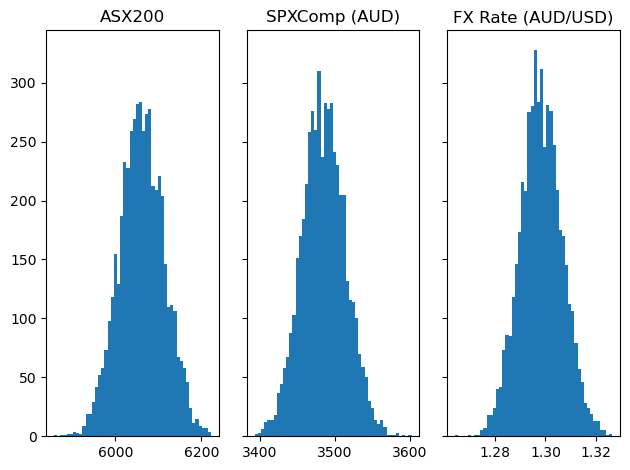

In [16]:
# Simulate asset prices over the next trading day
sim_ASX = fin_data_today['ASX200'] * np.exp(sim_logret[:, 0])
sim_SPX = fin_data_today['SPXComp'] * np.exp(sim_logret[:, 1])
sim_USD = fin_data_today['FXrate'] * np.exp(sim_logret[:, 2])

# Histogram of simulated values
N_bins = 50

fig, sim_rf = plt.subplots(1, 3, sharey = True, tight_layout = True)

sim_rf[0].hist(sim_ASX, bins = N_bins)
sim_rf[1].hist(sim_SPX, bins = N_bins)
sim_rf[2].hist(sim_USD, bins = N_bins)

sim_rf[0].set_title('ASX200')
sim_rf[1].set_title('SPXComp (AUD)')
sim_rf[2].set_title('FX Rate (AUD/USD)')

# (M1) Monte Carlo Simulation: VaR of Portfolio of Physical Assets

Text(0.5, 1.0, 'Simulated changes in portfolio value')

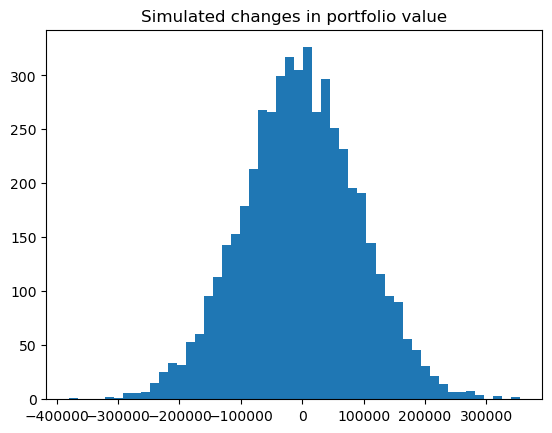

In [17]:
# Construct samples for the change in portfolio value
sim_V_portfolio = N_ASX * sim_ASX + N_SPX * sim_SPX + N_USD * sim_USD
sim_delta_V = sim_V_portfolio - (V_ASX + V_SPX + V_USD)

# Visualize hypothetical portfolio values
fig, axs = plt.subplots()
axs.hist(sim_delta_V, bins = N_bins)
axs.set_title('Simulated changes in portfolio value')

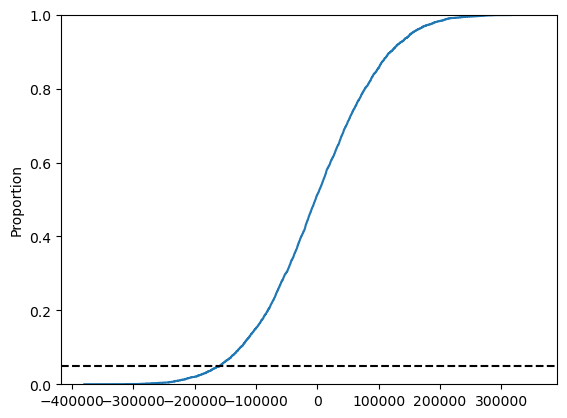

In [18]:
# Empirical CDF for physical portfolip P&L
sim_delta_V_ecdf = sns.ecdfplot(data = sim_delta_V)

# Construct horizontal line showing the 5th percentile (corresponding to the 95% VaR)
conf_level = 0.95
sim_delta_V_ecdf.axhline(y = 1 - conf_level, xmin = 0, xmax = 1, linestyle = 'dashed', color = 'black')

In [20]:
# Calculate the 95% VaR
sim_delta_V_sort = sorted(sim_delta_V)
physical_asset_VaR = -sim_delta_V_sort[int(N_sim * (1-conf_level))]

physical_asset_VaR

158516.43889930286

In [21]:
sim_delta_V_sort

[-380172.059259356,
 -317275.8364103576,
 -311298.70938158035,
 -304523.80141685717,
 -290292.99427852593,
 -286274.3441204764,
 -285281.6860378422,
 -282663.6630230723,
 -279407.0963632781,
 -277452.9458259726,
 -276708.07150044106,
 -274731.6758684069,
 -269128.2178773647,
 -267449.05112760514,
 -266599.006205271,
 -263719.0942606889,
 -260964.0099901976,
 -260120.03687919024,
 -258271.25289647374,
 -257981.02317892946,
 -252499.7795774853,
 -252105.72700973786,
 -248800.5760028232,
 -247783.32697218284,
 -243103.45235073846,
 -241445.3007674897,
 -241153.2421906758,
 -240829.2576272767,
 -240542.97866137512,
 -239968.64359581657,
 -238750.48436974082,
 -237722.70319109224,
 -236625.27474953607,
 -236500.5727004176,
 -235234.1361762127,
 -233987.59491902497,
 -233980.57796308585,
 -233688.1345607536,
 -233093.2554409802,
 -232165.45561276563,
 -231804.04022681993,
 -231139.4957454484,
 -230909.00402767863,
 -230838.85063001607,
 -230830.9265716169,
 -229915.3331506541,
 -228177.50567

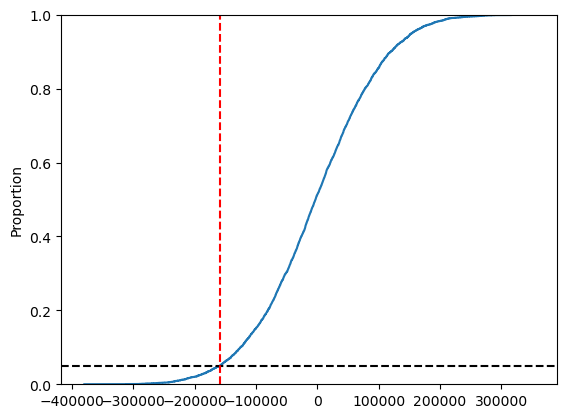

In [22]:
# Show location of VaR on the ECDF
sim_delta_V_ecdf.axvline(x = -physical_asset_VaR, linestyle = 'dashed', color = 'red')
sim_delta_V_ecdf.figure

In [23]:
# Calculate 95% ETL
physical_asset_ETL = -sim_delta_V[sim_delta_V <= -physical_asset_VaR].mean()
physical_asset_ETL

200226.69969581178

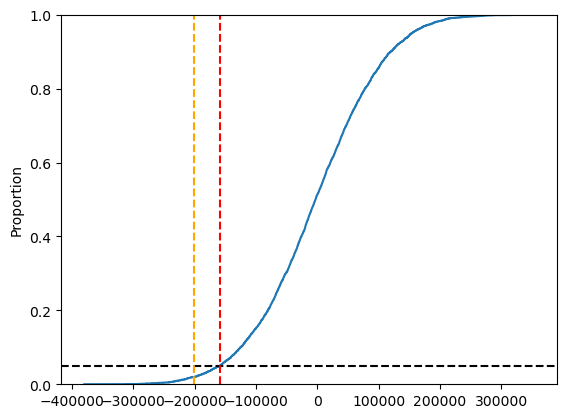

In [24]:
# Show VaR and ETL on the ECDF
sim_delta_V_ecdf.axvline(x = -physical_asset_ETL, linestyle = 'dashed', color = 'orange')
sim_delta_V_ecdf.figure

# (M1) Monte Carlo Simulation: VaR for European Call Option on ASX 200 (Full Valuation)

In [25]:
# Container for simulated call option prices
sim_op_ASX = np.zeros(N_sim)

# Calculate call option prices based on scenarios of the ASX 200
for j in range(0, N_sim):
    sim_ASX_price = sim_ASX[j]
    sim_op_ASX[j] = BSprice(sim_ASX_price, strike_ASX, mat_ASX, r_ASX, 0, vol_ASX, 'call')

(array([  1.,   0.,   1.,   1.,   3.,   3.,   4.,   3.,  10.,  20.,  24.,
         38.,  40.,  60.,  67.,  89., 111., 153., 123., 164., 230., 235.,
        253., 257., 269., 277., 269., 272., 268., 229., 206., 209., 199.,
        181., 128., 104.,  96., 101.,  59.,  57.,  58.,  45.,  24.,  14.,
         11.,  11.,   9.,   3.,   9.,   2.]),
 array([-91.44501911, -87.95513389, -84.46524867, -80.97536345,
        -77.48547823, -73.99559302, -70.5057078 , -67.01582258,
        -63.52593736, -60.03605214, -56.54616692, -53.0562817 ,
        -49.56639648, -46.07651126, -42.58662604, -39.09674082,
        -35.60685561, -32.11697039, -28.62708517, -25.13719995,
        -21.64731473, -18.15742951, -14.66754429, -11.17765907,
         -7.68777385,  -4.19788863,  -0.70800342,   2.7818818 ,
          6.27176702,   9.76165224,  13.25153746,  16.74142268,
         20.2313079 ,  23.72119312,  27.21107834,  30.70096356,
         34.19084877,  37.68073399,  41.17061921,  44.66050443,
         48.150389

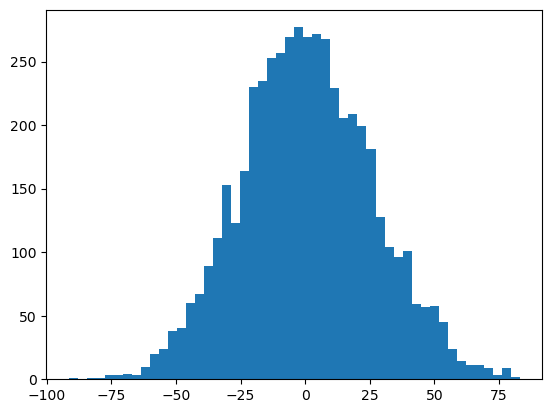

In [26]:
# Calculate simulated P&L for the call option (per unit call option)
sim_delta_op_ASX = sim_op_ASX - price_ASX

# Visualize using histogram
fig, sim_op_ASX_hist = plt.subplots()
sim_op_ASX_hist.hist(sim_delta_op_ASX, bins = N_bins)

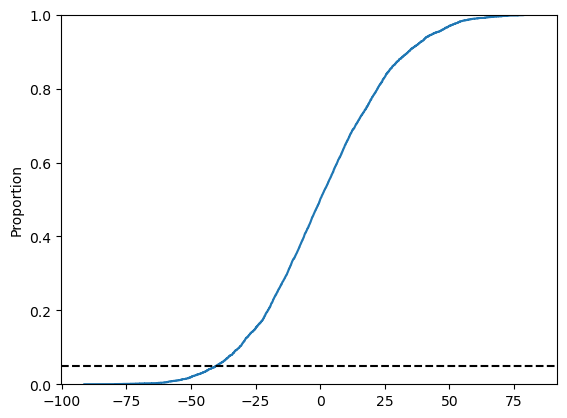

In [28]:
# Visualize using empirical CDF
sim_delta_op_ASX_ecdf = sns.ecdfplot(data = sim_delta_op_ASX)
sim_delta_op_ASX_ecdf.axhline(y = 1 - conf_level, xmin = 0, xmax = 1, linestyle = 'dashed', color = 'black')

In [29]:
# Calculate the 95% VaR
sim_delta_op_ASX_sort = sorted(sim_delta_op_ASX)
op_ASX_VaR = -sim_delta_op_ASX_sort[int(N_sim * (1-conf_level))]

op_ASX_VaR

40.19780554214367

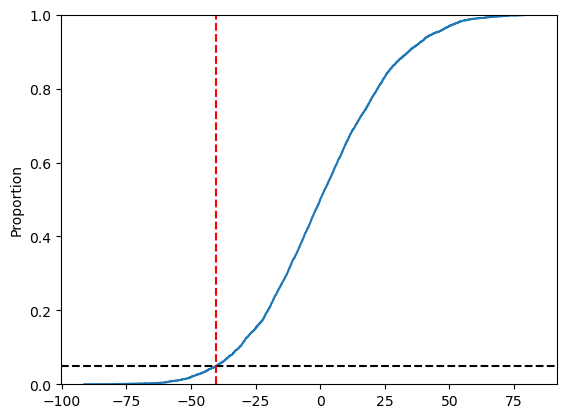

In [30]:
# Show VaR on the ECDF
sim_delta_op_ASX_ecdf.axvline(x = -op_ASX_VaR, linestyle = 'dashed', color = 'red')
sim_delta_op_ASX_ecdf.figure

In [31]:
# Calculate the 95% ETL
op_ASX_ETL = -sim_delta_op_ASX[sim_delta_op_ASX <= -op_ASX_VaR].mean()
op_ASX_ETL

49.919652063857505

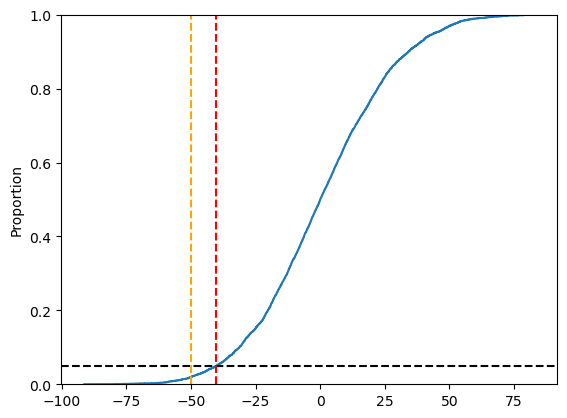

In [32]:
# Show VaR and ETL on the ECDF
sim_delta_op_ASX_ecdf.axvline(x = -op_ASX_ETL, linestyle = 'dashed', color = 'orange')
sim_delta_op_ASX_ecdf.figure

# (M1) Monte Carlo Simulation: VaR for European Call Option on ASX 200 (Partial Simulation)

(array([  1.,   0.,   1.,   1.,   3.,   3.,   4.,   2.,   7.,  20.,  18.,
         30.,  46.,  52.,  63.,  77., 107., 131., 141., 139., 201., 247.,
        232., 260., 276., 280., 274., 258., 270., 258., 212., 201., 209.,
        192., 144., 108., 104.,  97.,  75.,  53.,  63.,  52.,  26.,  16.,
         12.,   9.,  11.,   3.,   9.,   2.]),
 array([-92.93696404, -89.43946608, -85.94196812, -82.44447017,
        -78.94697221, -75.44947425, -71.95197629, -68.45447833,
        -64.95698038, -61.45948242, -57.96198446, -54.4644865 ,
        -50.96698855, -47.46949059, -43.97199263, -40.47449467,
        -36.97699671, -33.47949876, -29.9820008 , -26.48450284,
        -22.98700488, -19.48950692, -15.99200897, -12.49451101,
         -8.99701305,  -5.49951509,  -2.00201713,   1.49548082,
          4.99297878,   8.49047674,  11.9879747 ,  15.48547265,
         18.98297061,  22.48046857,  25.97796653,  29.47546449,
         32.97296244,  36.4704604 ,  39.96795836,  43.46545632,
         46.962954

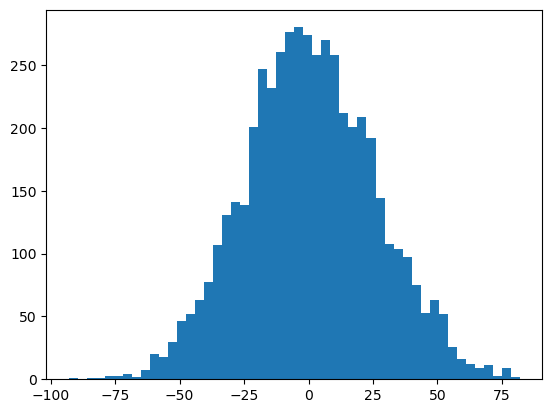

In [33]:
# Simulate changes in option price using the delta-gamma approximation
sim_delta_op_ASX_dg = fin_data_today['ASX200'] * delta_ASX * sim_logret[:, 0] + 0.5 * (fin_data_today['ASX200'] ** 2) * gamma_ASX * (sim_logret[:,0] ** 2)

# Visualize using histogram
fig, sim_op_ASX_dg_hist = plt.subplots()
sim_op_ASX_dg_hist.hist(sim_delta_op_ASX_dg, bins = N_bins)

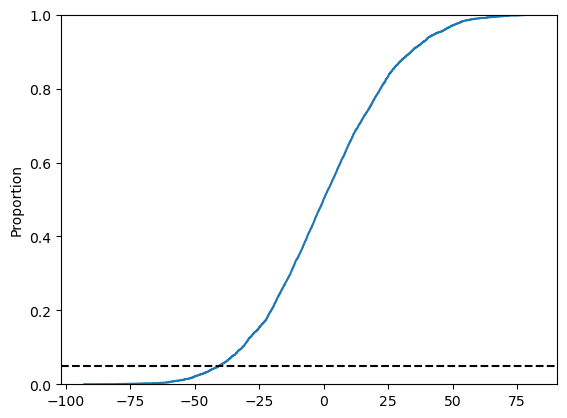

In [34]:
# Visualize using empirical CDF
sim_delta_op_ASX_dg_ecdf = sns.ecdfplot(data = sim_delta_op_ASX_dg)
sim_delta_op_ASX_dg_ecdf.axhline(y = 1 - conf_level, xmin = 0, xmax = 1, linestyle = 'dashed', color = 'black')

In [35]:
# Calculate the 95% VaR
sim_delta_op_ASX_dg_sort = sorted(sim_delta_op_ASX_dg)
op_ASX_VaR_dg = -sim_delta_op_ASX_dg_sort[int(N_sim * (1-conf_level))]

# Calculate the 95% ETL
op_ASX_ETL_dg = -sim_delta_op_ASX_dg[sim_delta_op_ASX_dg <= -op_ASX_VaR_dg].mean()

print([op_ASX_VaR_dg, op_ASX_ETL_dg])

[40.47918303478367, 50.36921619329035]


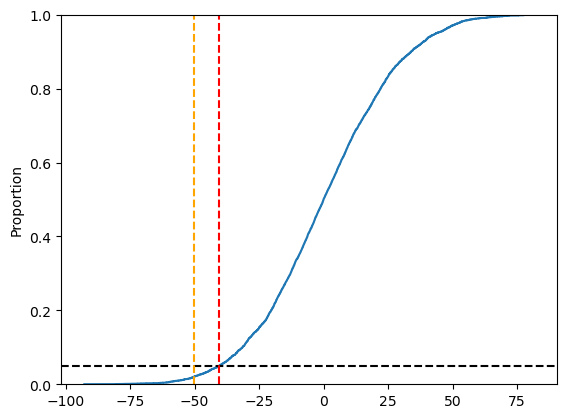

In [36]:
# Show VaR and ETL on the ECDF
sim_delta_op_ASX_dg_ecdf.axvline(x = -op_ASX_VaR_dg, linestyle = 'dashed', color = 'red')
sim_delta_op_ASX_dg_ecdf.axvline(x = -op_ASX_ETL_dg, linestyle = 'dashed', color = 'orange')
sim_delta_op_ASX_dg_ecdf.figure

# (M2) Simulation of Risk Factors

Under (M2), one-day log-returns can be simulated by taking $\Delta = \frac{1}{252}$ (assuming there are 252 trading days in a year) and by simulating values of a normal random vector $(\varepsilon_1, \varepsilon_2, \varepsilon_3)^\top$ such that $\mathbb{E}(\varepsilon_i) = 0$ and $\text{Var}(\varepsilon_i) = 1$ for each $i=1,2,3$, and 

$$\text{Corr}(\varepsilon_1, \varepsilon_2) = 0.13, \quad \text{Corr}(\varepsilon_1, \varepsilon_3) = -0.10, \quad \text{Corr}(\varepsilon_2, \varepsilon_3) = 0.24.$$ 

It follows that the covariance matrix of $(\varepsilon_1, \varepsilon_2, \varepsilon_3)^\top$ is

$$\Sigma = 
\left[\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right]
\left[\begin{array}{ccc}
1 & 0.13 & 0.24 \\
0.13 & 1 & -0.10 \\
0.24 & -0.10 & 1
\end{array}\right]
\left[\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right] = 
\left[\begin{array}{ccc}
1 & 0.13 & 0.24 \\
0.13 & 1 & -0.10 \\
0.24 & -0.10 & 1
\end{array}\right].$$

In general, the covariance matrix of a multivariate normal random vector $X = (X_1,\dots,X_n)^\top$ can be constructed as

$$\text{Cov}(X) = \text{diag}(\sigma_1^2, \dots, \sigma_n^2) \, \text{Corr}(X) \, \text{diag}(\sigma_1^2, \dots, \sigma_n^2).$$

In [37]:
# Illustration of calculation (but not needed due to unit variances)
corr_mat = np.array([[1, 0.13, 0.24], [0.13, 1, -0.10], [0.24, -0.10, 1]])
var_mat = np.diag(np.array([1, 1, 1]))
cov_mat = np.matmul(var_mat, np.matmul(corr_mat, var_mat))
cov_mat

array([[ 1.  ,  0.13,  0.24],
       [ 0.13,  1.  , -0.1 ],
       [ 0.24, -0.1 ,  1.  ]])

The random vector $\varepsilon = (\varepsilon_1, \varepsilon_2, \varepsilon_3)^\top$ can therefore be expressed in terms of a standard normal random vector $\mathbf{Z} = (Z_1, Z_2, Z_3)^\top \sim N(\mathbf{0}, \mathbf{I})$ as 

$$\varepsilon = \mathbf{LZ}$$

where $\mathbf{L}$ is any matrix such that $\mathbf{LL}^\top = \Sigma.$ One choice for $\mathbf{L}$ is the lower triangular Cholesky factor of $\Sigma$.

In [38]:
# Cholesky factorization of the covariance matrix
cov_mat_chol = sp.linalg.cholesky(cov_mat, lower = True)
cov_mat_chol

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.13      ,  0.99151399,  0.        ],
       [ 0.24      , -0.13232289,  0.96171235]])

Therefore, to simulate $\varepsilon$, we simply need to simulate $\mathbf{Z}$ from the standard multivariate normal distribution.

In [39]:
# Simulate Z
sim_Z = sp.stats.norm.rvs(size = (3, N_sim), random_state = 1234)

# Calculate simulated epsilon
sim_epsilon = np.dot(cov_mat_chol, sim_Z)
sim_epsilon = np.transpose(sim_epsilon)    # So that it is N_sim x 3

# Check covariance matrix of simulated epsilon
np.corrcoef(sim_epsilon, rowvar = False)

array([[ 1.        ,  0.1513305 ,  0.2236502 ],
       [ 0.1513305 ,  1.        , -0.09524035],
       [ 0.2236502 , -0.09524035,  1.        ]])

It is then straightforward to simulate one-day log-returns and the corresponding asset prices from the given equations in (M2).

Text(0.5, 1.0, 'FX Rate (AUD/USD)')

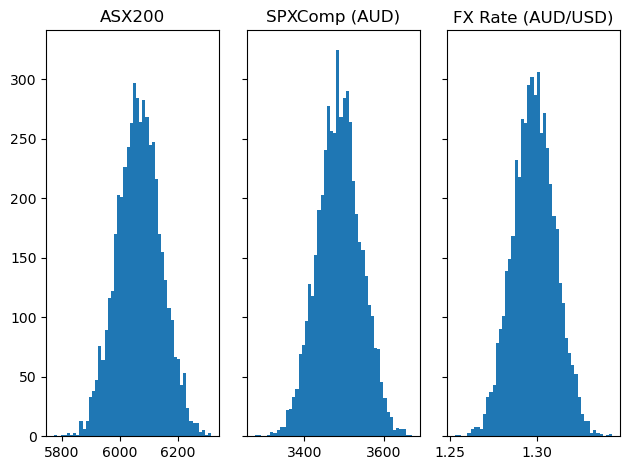

In [40]:
# Simulate one-day log-returns
dt = 1/252
sim_ASX_logret = (0.15 - 0.5 * (0.20 ** 2)) * dt + 0.20 * np.sqrt(dt) * sim_epsilon[:, 0]
sim_SPX_logret = (0.10 - 0.5 * (0.25 ** 2)) * dt + 0.25 * np.sqrt(dt) * sim_epsilon[:, 1]
sim_USD_logret = - 0.5 * (0.15 ** 2) * dt + 0.15 * np.sqrt(dt) * sim_epsilon[:, 2]

# Calculate simulated future asset prices
sim_ASX = fin_data_today['ASX200'] * np.exp(sim_ASX_logret)
sim_SPX = fin_data_today['SPXComp'] * np.exp(sim_SPX_logret)
sim_USD = fin_data_today['FXrate'] * np.exp(sim_USD_logret)

# Histogram of simulated values
N_bins = 50

fig, sim_rf = plt.subplots(1, 3, sharey = True, tight_layout = True)

sim_rf[0].hist(sim_ASX, bins = N_bins)
sim_rf[1].hist(sim_SPX, bins = N_bins)
sim_rf[2].hist(sim_USD, bins = N_bins)

sim_rf[0].set_title('ASX200')
sim_rf[1].set_title('SPXComp (AUD)')
sim_rf[2].set_title('FX Rate (AUD/USD)')

The estimation of the VaR and ETL then follows the same procedure as above, using the simulated prices from model (M2).